In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.vgg16 import decode_predictions
from tensorflow.keras.models import Model
from PIL import Image
import os

2023-06-16 18:27:31.019859: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


1/1 [==============================] - 0s 267ms/step


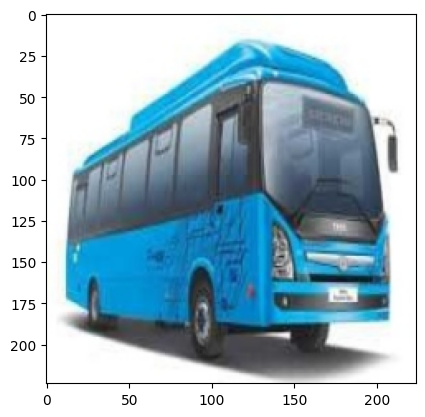

In [5]:
def LoadData(X):
    X = X + '/vec.npy'
    X = np.load(X)
    X = X.reshape((X.shape[0],X.shape[2]))
    return X

def LoadImage(X):
    X = X + '/quary.jpg'
    X = cv2.imread(X)
    X = X.transpose(2,0,1)
    B = cv2.resize(X[0], (224,224))
    G = cv2.resize(X[1], (224,224))
    R = cv2.resize(X[2], (224,224))
    X = np.concatenate([[R],[G],[B]])
    return X.transpose(1,2,0)

def QVector(X,model):
    X = LoadImage(X)
    X = X.reshape((1, X.shape[0], X.shape[1], X.shape[2]))
    X = tf.keras.applications.vgg16.preprocess_input(X)
    X = model.predict(X)
    X = X.reshape((X.shape[1]))
    return X

#Calculating Eucleadian Distance
def EDistance(X,model):
    V1 = LoadData(X)
    V2 = QVector(X,model)
    V2 = np.tile(V2, (V1.shape[0],1))
    D = np.linalg.norm(V1 - V2, axis=1)
    return D

def MaxIndex(X,model):
    X = EDistance(X,model)
    X = np.argsort(X)
    X = X[:9]
    return X

def Resize(X):
    X = X.transpose(2,0,1)
    A = cv2.resize(X[0], (224,224))
    B = cv2.resize(X[1], (224,224))
    C = cv2.resize(X[2], (224,224))
    X = np.concatenate([[A],[B],[C]])
    return X.transpose(1,2,0)

def SearchImages(X,model):
    lst = MaxIndex(X,model)
    X = X + '/phone'
    lst1 = os.listdir(X)
    index = []
    for i in lst:
        index = index + [lst1[i]]
    image_list = []
    for filename in index:
        img = Image.open(os.path.join(X, filename))
        img = np.array(img)
        img = Resize(img)
        image_list = image_list + [img]
    return np.array(image_list)

model = tf.keras.applications.VGG16(weights='imagenet')
model = Model(inputs=model.input, outputs=model.get_layer('fc1').output)   
path = '/home/deb/quary'    
img = SearchImages(path,model)

#Showing Quary Image
plt.imshow(LoadImage(path))

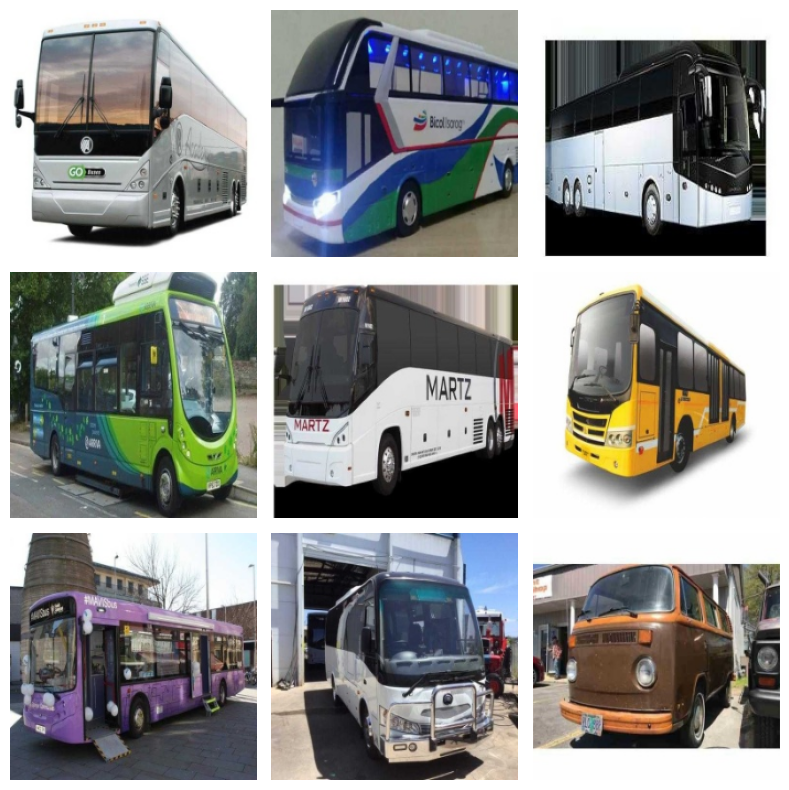

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(img[i])
    ax.axis('off')

fig.tight_layout()
#Showing Search result in the database
plt.show()